In [13]:
from keras.datasets import fashion_mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.11.0


In [14]:
def load_data():
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    print(f"Train shape: {train_images.shape}")
    print(f"Test shape: {test_images.shape}")
    return train_images, train_labels, test_images, test_labels, class_names

train_images, train_labels, test_images, test_labels, class_names = load_data()

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [15]:
def preprocess_data(train_images, test_images):
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    return train_images, test_images

train_images, test_images = preprocess_data(train_images, test_images)

In [10]:
train_images_set = train_images[:(len(train_images)-(len(train_images)//5))]
train_labels_set = train_labels[:(len(train_labels)-(len(train_labels)//5))]

validation_images_set = train_images[(len(train_images)-(len(train_images)//5)):]
validation_labels_set = train_labels[(len(train_labels)-(len(train_labels)//5)):]

In [168]:
def plot_all_models(model_names, model_histories):
    # plot the validation and training loss in one plot, and the validation and training accuracy in another plot.
    # The y axis should be the loss or accuracy and be the same for each plot.
    # One plot only shows one model, so if there are 4 models, I should have 8 plots. 4 for loss and 4 for accuracy.
    # The x axis should be the epoch number.
    # The title of each plot should be the name of the model.
    # The legend should be the training and validation loss/accuracy.
    # The plots should be in the same figure.
    min_loss = 100
    max_loss = 0
    min_acc = 100
    max_acc = 0

    for history in model_histories:
        # set the minimum and maximum loss and accuracy
        # for the y axis of the plots
        # so that all plots will have the same y axis
        # and we can compare them
        if min(history.history['loss']) < min_loss:
            min_loss = min(history.history['loss'])
        if max(history.history['loss']) > max_loss:
            max_loss = max(history.history['loss'])
        if min(history.history['accuracy']) < min_acc:
            min_acc = min(history.history['accuracy'])
        if max(history.history['accuracy']) > max_acc:
            max_acc = max(history.history['accuracy'])
    delta_loss = max_loss - min_loss
    delta_acc = max_acc - min_acc
    min_loss = min_loss - delta_loss * 0.05
    max_loss = max_loss + delta_loss * 0.05
    min_acc = min_acc - delta_acc * 0.05
    max_acc = max_acc + delta_acc * 0.05

    for i in range(len(model_names)):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
        fig.suptitle(f"Loss and accuracy for {model_names[i]}", fontsize=16)
        ax1.plot(model_histories[i].history['loss'], label='Training Loss')
        ax1.plot(model_histories[i].history['val_loss'], label='Validation Loss')
        ax1.set_title("Loss")
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_ylim([min_loss, max_loss])
        ax1.set_xlim([0, 15])
        ax1.set_xticks(np.arange(0, len(model_histories[i].history['loss']), 1))
        ax1.legend()

        ax2.plot(model_histories[i].history['accuracy'], label='Training Accuracy')
        ax2.plot(model_histories[i].history['val_accuracy'], label='Validation Accuracy')
        ax2.set_title("Accuracy")
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.set_ylim([min_acc, 1])
        ax2.set_xlim([0, 15])
        ax2.set_xticks(np.arange(0, len(model_histories[i].history['accuracy']), 1))
        ax2.legend()
        plt.tight_layout()
        plt.show()



In [130]:
def create_model_baseline():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


def lr_scheduler(epoch, lr):
    if epoch % 5 == 0 and epoch > 0:
        lr = lr / 2
    return lr


def train_model(train_images, train_labels , model, epochs=15, patience=5):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=patience, restore_best_weights=True
    )
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
    model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    history = model.fit(train_images, train_labels, validation_data=(validation_images_set, validation_labels_set), epochs=epochs, batch_size=64, callbacks=[callback, early_stopping])
    return model, history

### Baseline model

In [131]:
model_baseline = create_model_baseline()
model_baseline, history_baseline = train_model(train_images_set, train_labels_set, model_baseline)
model_baseline.save('model_baseline')

Epoch 1/15
750/750 [==============================] - 9s 9ms/step - loss: 0.5838 - accuracy: 0.7891 - val_loss: 0.4030 - val_accuracy: 0.8552 - lr: 0.0010
Epoch 2/15
750/750 [==============================] - 6s 8ms/step - loss: 0.3624 - accuracy: 0.8697 - val_loss: 0.3437 - val_accuracy: 0.8773 - lr: 0.0010
Epoch 3/15
750/750 [==============================] - 6s 8ms/step - loss: 0.3136 - accuracy: 0.8853 - val_loss: 0.3341 - val_accuracy: 0.8787 - lr: 0.0010
Epoch 4/15
750/750 [==============================] - 6s 7ms/step - loss: 0.2825 - accuracy: 0.8962 - val_loss: 0.3105 - val_accuracy: 0.8857 - lr: 0.0010
Epoch 5/15
750/750 [==============================] - 6s 8ms/step - loss: 0.2580 - accuracy: 0.9058 - val_loss: 0.2752 - val_accuracy: 0.9004 - lr: 0.0010
Epoch 6/15
750/750 [==============================] - 6s 7ms/step - loss: 0.2177 - accuracy: 0.9210 - val_loss: 0.2571 - val_accuracy: 0.9070 - lr: 5.0000e-04
Epoch 7/15
750/750 [==============================] - 5s 7ms/step 

INFO:tensorflow:Assets written to: model_baseline/assets


INFO:tensorflow:Assets written to: model_baseline/assets


### Variant 1, Dropout

In [173]:
#Dropout inclussion after second maxpooling
#Dropout prevents overfitting by dropping a random weight (.5= 50% chance to happen)
#Dropout reduces correlation between neurons. It is added after second convolution layer before maxpolling since overfitting is most likely to happen there
def create_model_variant1():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


model_v1 = create_model_variant1()
model_v1, history_v1 = train_model(train_images_set, train_labels_set, model_v1)
model_v1.save('model_v1')
#Result: Dropout variant is both better than baseline on the test data and train data. A clear sign that the base model is slightly overfit.
#Conclussion: loss: 0.2490 - accuracy: 0.9146 Baseline - loss: 0.2319 - accuracy: 0.9158 Variant1

Epoch 1/15


2023-03-28 21:43:45.414141: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_50/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


750/750 [==============================] - 9s 9ms/step - loss: 0.5733 - accuracy: 0.7904 - val_loss: 0.4197 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 2/15
750/750 [==============================] - 6s 8ms/step - loss: 0.3662 - accuracy: 0.8682 - val_loss: 0.3623 - val_accuracy: 0.8779 - lr: 0.0010
Epoch 3/15
750/750 [==============================] - 6s 8ms/step - loss: 0.3133 - accuracy: 0.8846 - val_loss: 0.3418 - val_accuracy: 0.8794 - lr: 0.0010
Epoch 4/15
750/750 [==============================] - 6s 8ms/step - loss: 0.2836 - accuracy: 0.8952 - val_loss: 0.3039 - val_accuracy: 0.8877 - lr: 0.0010
Epoch 5/15
750/750 [==============================] - 6s 8ms/step - loss: 0.2602 - accuracy: 0.9035 - val_loss: 0.3113 - val_accuracy: 0.8844 - lr: 0.0010
Epoch 6/15
750/750 [==============================] - 6s 8ms/step - loss: 0.2240 - accuracy: 0.9179 - val_loss: 0.2568 - val_accuracy: 0.9060 - lr: 5.0000e-04
Epoch 7/15
750/750 [==============================] - 6s 8ms/step - loss: 0.2

INFO:tensorflow:Assets written to: model_v1/assets


INFO:tensorflow:Assets written to: model_v1/assets


### Variant 2, L1 regularization

In [136]:
#L1 Regularization: Added to dense layers
#L1 prevents overfitting by making the model use more weights that are set to 0
def create_model_variant2():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)),
        tf.keras.layers.Dense(10, activation='softmax' , kernel_regularizer=tf.keras.regularizers.l1(0.001))
    ])
    return model

model_v2 = create_model_variant2()
model_v2, history_v2 = train_model(train_images_set, train_labels_set, model_v2)
model_v2.save('model_v2')

#Result: L1 performs better on the train data but has higher loss. This means its underfitting and will need more epochs to converge.
# In the test data it performs a bit worse than baseline.
# Different value for the strength could improve the results. In short it underfits compared to the baseline. Can't coverge fast enough in 15 epochs.
#Conclussion: loloss: 0.2490 - accuracy: 0.9146 Baseline - loss: 0.3358 - accuracy: 0.9046 Variant2

Epoch 1/15
750/750 [==============================] - 8s 9ms/step - loss: 1.1061 - accuracy: 0.7717 - val_loss: 0.7243 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 2/15
750/750 [==============================] - 6s 8ms/step - loss: 0.6306 - accuracy: 0.8506 - val_loss: 0.5749 - val_accuracy: 0.8469 - lr: 0.0010
Epoch 3/15
750/750 [==============================] - 6s 8ms/step - loss: 0.5258 - accuracy: 0.8704 - val_loss: 0.4953 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 4/15
750/750 [==============================] - 6s 8ms/step - loss: 0.4686 - accuracy: 0.8802 - val_loss: 0.4446 - val_accuracy: 0.8873 - lr: 0.0010
Epoch 5/15
750/750 [==============================] - 6s 8ms/step - loss: 0.4364 - accuracy: 0.8866 - val_loss: 0.4429 - val_accuracy: 0.8813 - lr: 0.0010
Epoch 6/15
750/750 [==============================] - 6s 8ms/step - loss: 0.3834 - accuracy: 0.8985 - val_loss: 0.3974 - val_accuracy: 0.8892 - lr: 5.0000e-04
Epoch 7/15
750/750 [==============================] - 6s 8ms/step 

INFO:tensorflow:Assets written to: model_v2/assets


INFO:tensorflow:Assets written to: model_v2/assets


### Variant 3, L2 regularization

In [140]:
#L2 Regularization: Adding to dense layers
#L2 prevents overfitting by slowly melting large weight values, encourages model to use lower weights
def create_model_variant3():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
    ])
    return model

model_v3 = create_model_variant3()
model_v3, history_v3 = train_model(train_images_set, train_labels_set, model_v3)
model_v3.save('model_v3')

#Result: L2 variant is a lot better than baseline on the train data but the accuracy seems better on the test data.
# It seems to converge faster however also appears to overfit since loss is higher on the test data.
#Conclussion: loss: 0.2490 - accuracy: 0.9146 Baseline - loss: 0.2698 - accuracy: 0.9173 Variant3

Epoch 1/15
750/750 [==============================] - 8s 9ms/step - loss: 0.6604 - accuracy: 0.7892 - val_loss: 0.5148 - val_accuracy: 0.8372 - lr: 0.0010
Epoch 2/15
750/750 [==============================] - 7s 9ms/step - loss: 0.4339 - accuracy: 0.8682 - val_loss: 0.4051 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 3/15
750/750 [==============================] - 7s 9ms/step - loss: 0.3743 - accuracy: 0.8847 - val_loss: 0.3701 - val_accuracy: 0.8842 - lr: 0.0010
Epoch 4/15
750/750 [==============================] - 6s 8ms/step - loss: 0.3394 - accuracy: 0.8935 - val_loss: 0.3518 - val_accuracy: 0.8897 - lr: 0.0010
Epoch 5/15
750/750 [==============================] - 6s 8ms/step - loss: 0.3134 - accuracy: 0.9028 - val_loss: 0.3399 - val_accuracy: 0.8907 - lr: 0.0010
Epoch 6/15
750/750 [==============================] - 6s 7ms/step - loss: 0.2712 - accuracy: 0.9171 - val_loss: 0.3024 - val_accuracy: 0.9046 - lr: 5.0000e-04
Epoch 7/15
750/750 [==============================] - 6s 8ms/step 

INFO:tensorflow:Assets written to: model_v3/assets


INFO:tensorflow:Assets written to: model_v3/assets


### Variant 4, Batch normalization

In [175]:
#Batch normalization: After first Conv2D layer 
#Stabilize learning process. Normalizes values to 0 or to 1 depending on whichever they are closer to using mean and std, solves internal covariate shift.
def create_model_variant4():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
    ])
    return model

model_v4 = create_model_variant4()
model_v4, history_v4 = train_model(train_images_set, train_labels_set, model_v4)
model_v4.save('model_v4')

#Result: Batch normalization trains excelently BUT will need more epochs to improve validation accuracy. Seems to overfit.
#This variant could also largely improve by adding a dropping layer and regulizers to reduce overfitting (but we can only have 1 change per variant).
#Conclussion: loss: 0.2490 - accuracy: 0.9146 Baseline - loss: 0.4109 - accuracy: 0.9140 Variant3

Epoch 1/15


2023-03-28 21:47:16.492547: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_51/dropout_13/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


750/750 [==============================] - 10s 10ms/step - loss: 0.5474 - accuracy: 0.8339 - val_loss: 0.4728 - val_accuracy: 0.8612 - lr: 0.0010
Epoch 2/15
750/750 [==============================] - 7s 9ms/step - loss: 0.3709 - accuracy: 0.8863 - val_loss: 0.3510 - val_accuracy: 0.8879 - lr: 0.0010
Epoch 3/15
750/750 [==============================] - 7s 10ms/step - loss: 0.3204 - accuracy: 0.9002 - val_loss: 0.3435 - val_accuracy: 0.8915 - lr: 0.0010
Epoch 4/15
750/750 [==============================] - 7s 9ms/step - loss: 0.2931 - accuracy: 0.9081 - val_loss: 0.3290 - val_accuracy: 0.8928 - lr: 0.0010
Epoch 5/15
750/750 [==============================] - 7s 10ms/step - loss: 0.2702 - accuracy: 0.9146 - val_loss: 0.2951 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 6/15
750/750 [==============================] - 6s 9ms/step - loss: 0.2268 - accuracy: 0.9285 - val_loss: 0.2770 - val_accuracy: 0.9128 - lr: 5.0000e-04
Epoch 7/15
750/750 [==============================] - 7s 9ms/step - loss:

INFO:tensorflow:Assets written to: model_v4/assets


INFO:tensorflow:Assets written to: model_v4/assets


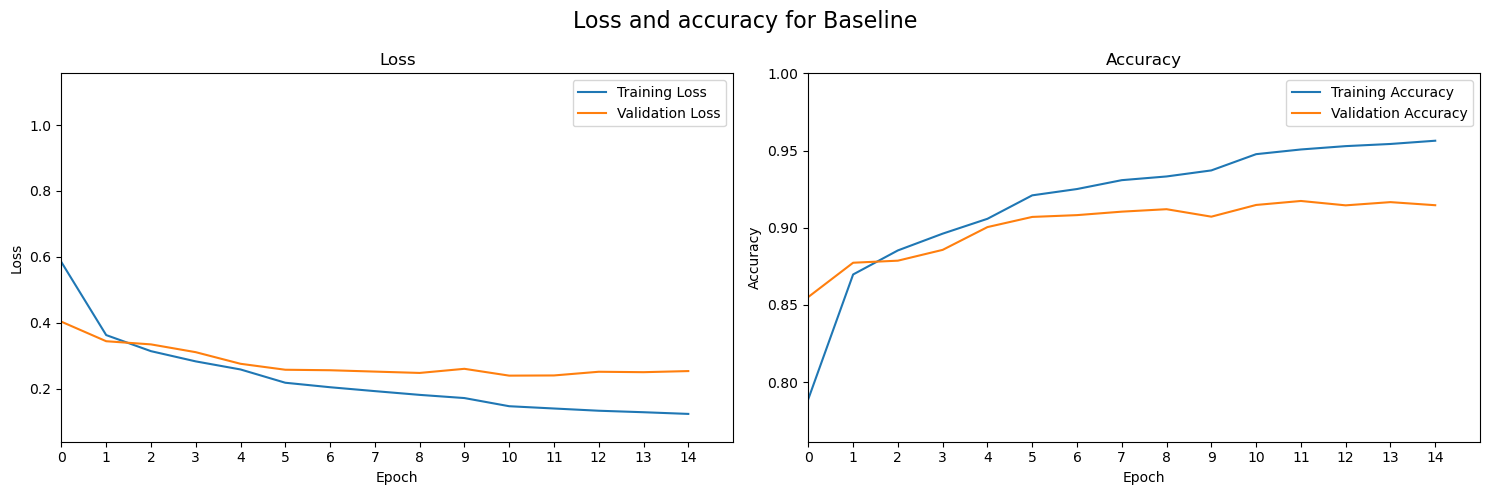

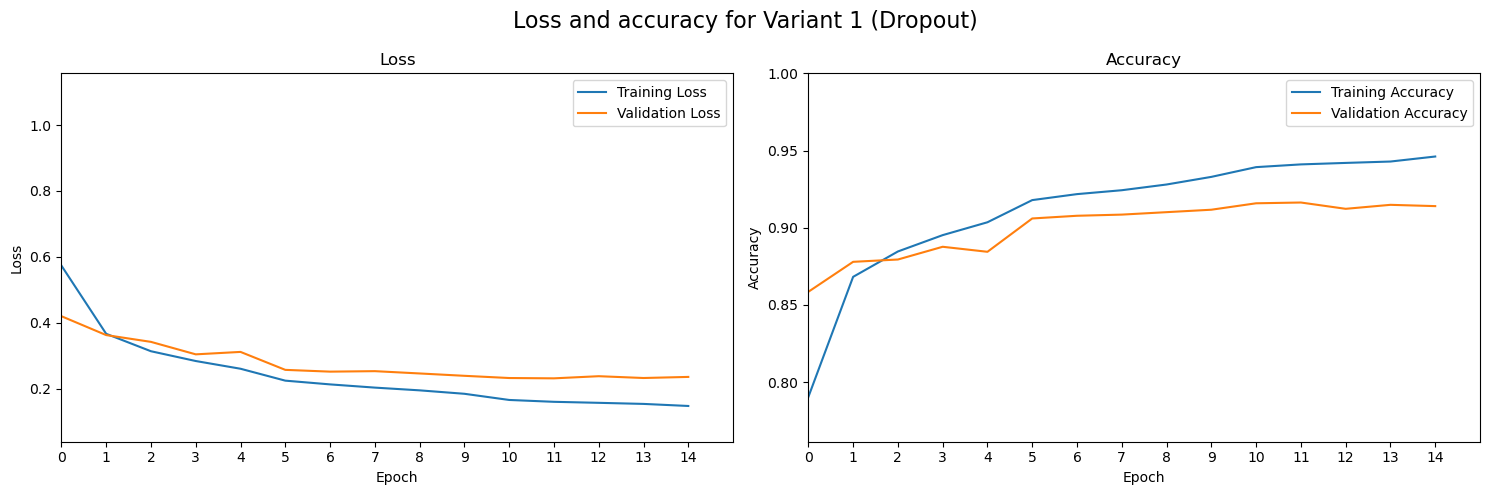

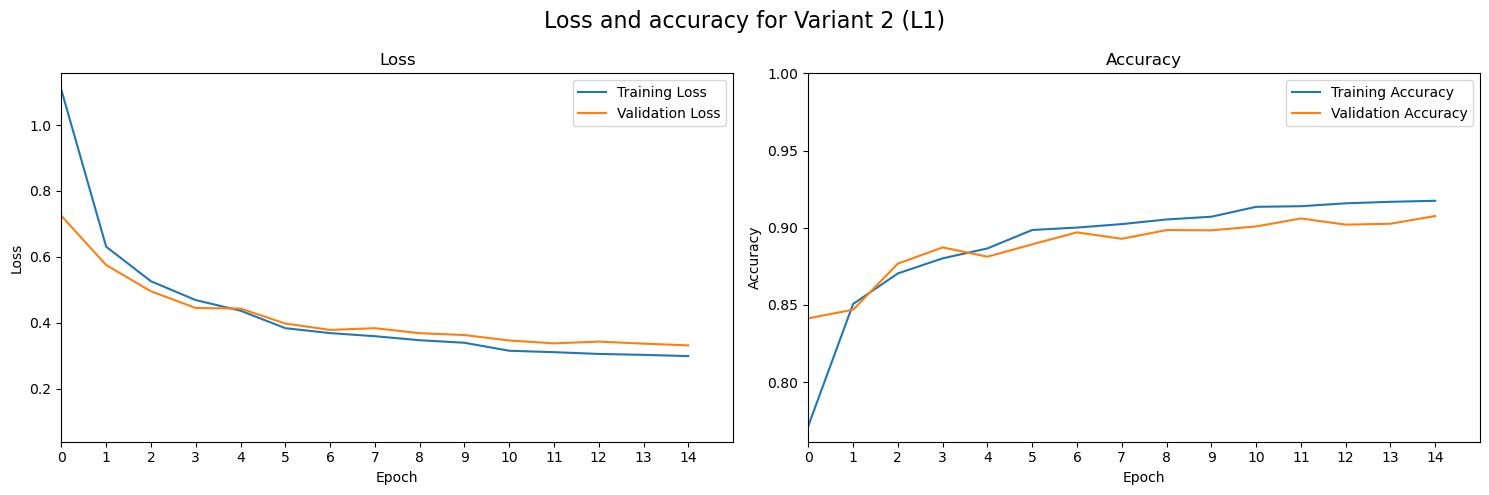

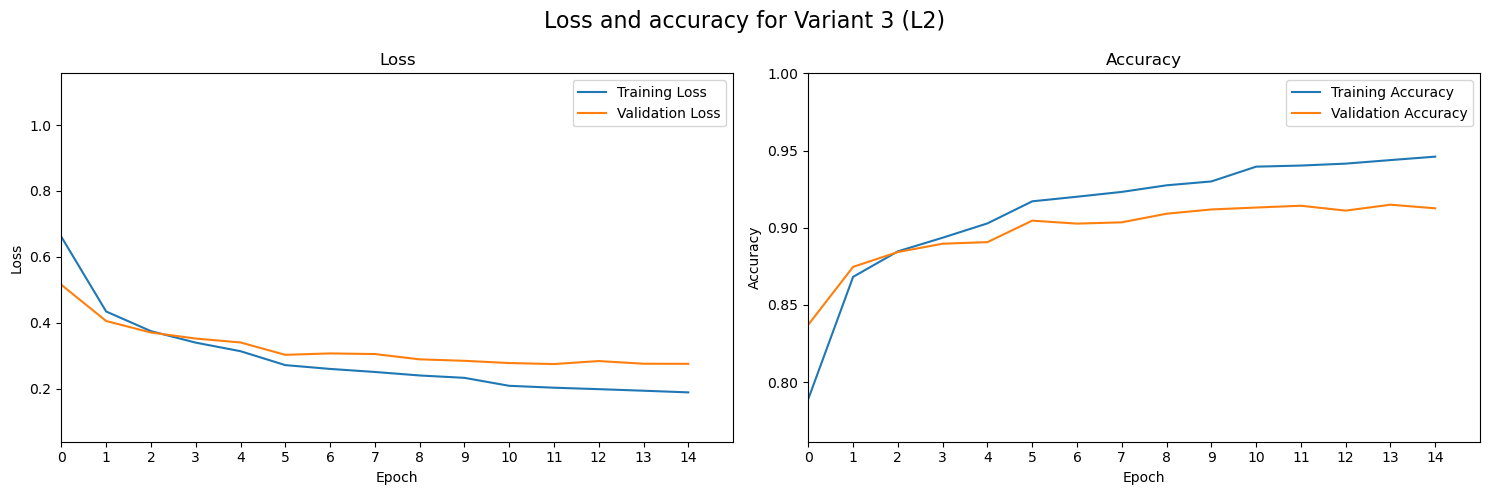

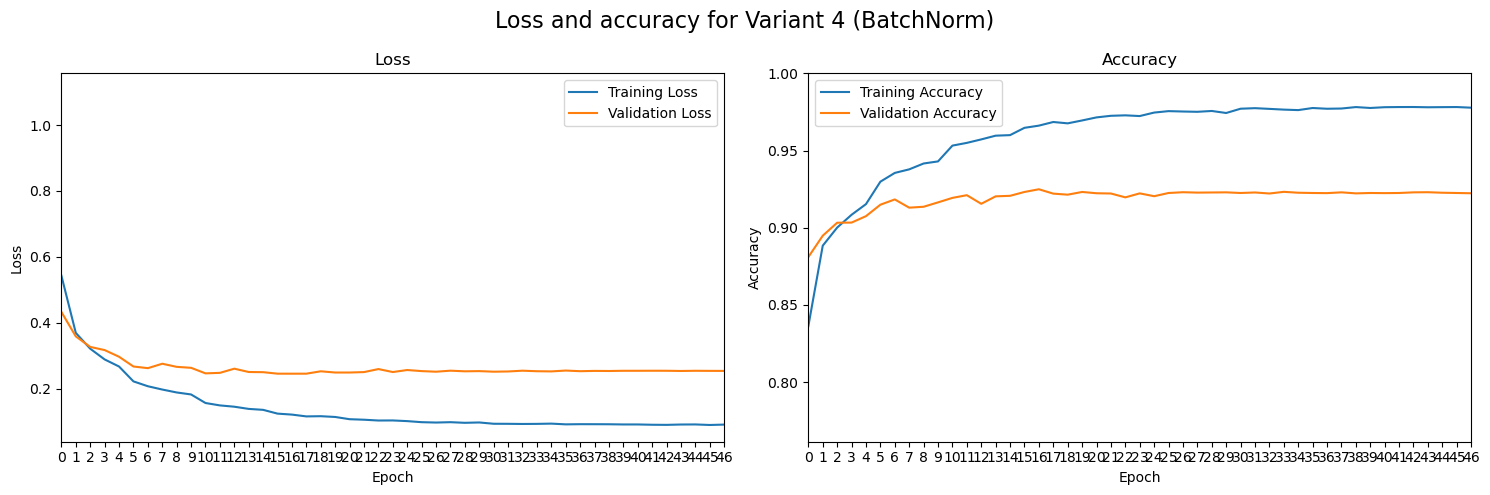

In [174]:
histories = [history_baseline, history_v1, history_v2, history_v3, history_v4]
model_names = ['Baseline', 'Variant 1 (Dropout)', 'Variant 2 (L1)', 'Variant 3 (L2)', 'Variant 4 (BatchNorm)']

plot_all_models(model_names, histories)

In [54]:
#Two Best performing CNNs

model1Drop = create_model_variant1()
model2Batch = create_model_variant3()

model1Drop, historyDrop = train_model(train_images, train_labels, model1Drop)

model2Batch, historyBatch = train_model(train_images, train_labels, model2Batch)


Epoch 1/15


2023-03-28 01:23:46.178779: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_20/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 9s 9ms/step - loss: 0.5282 - accuracy: 0.8054 - val_loss: 0.3885 - val_accuracy: 0.8648 - lr: 0.0010
Epoch 2/15
938/938 [==============================] - 7s 8ms/step - loss: 0.3410 - accuracy: 0.8763 - val_loss: 0.3069 - val_accuracy: 0.8905 - lr: 0.0010
Epoch 3/15
938/938 [==============================] - 7s 8ms/step - loss: 0.2954 - accuracy: 0.8925 - val_loss: 0.2782 - val_accuracy: 0.8985 - lr: 0.0010
Epoch 4/15
938/938 [==============================] - 7s 8ms/step - loss: 0.2681 - accuracy: 0.9016 - val_loss: 0.2635 - val_accuracy: 0.9063 - lr: 0.0010
Epoch 5/15
938/938 [==============================] - 7s 8ms/step - loss: 0.2478 - accuracy: 0.9090 - val_loss: 0.2184 - val_accuracy: 0.9226 - lr: 0.0010
Epoch 6/15
938/938 [==============================] - 8s 8ms/step - loss: 0.2132 - accuracy: 0.9198 - val_loss: 0.1893 - val_accuracy: 0.9347 - lr: 5.0000e-04
Epoch 7/15
938/938 [==============================] - 7s 8ms/step - loss: 0.1

In [55]:
# Evaluate the model1
test_loss, test_acc = model1Drop.evaluate(test_images, test_labels, verbose=1)

print(f"model1Drop: Test accuracy: {test_acc}")
print(f"model1Drop: Test loss: {test_loss}")


# Evaluate the model2
test_loss, test_acc = model2Batch.evaluate(test_images, test_labels, verbose=1)

print(f"model2Batch: Test accuracy: {test_acc}")
print(f"model2Batch: Test loss: {test_loss}")

313/313 [==============================] - 1s 4ms/step - loss: 0.2212 - accuracy: 0.9206
Test accuracy: 0.9205999970436096
Test loss: 0.2212146669626236
313/313 [==============================] - 1s 4ms/step - loss: 0.4122 - accuracy: 0.9139
Test accuracy: 0.9139000177383423
Test loss: 0.4121916592121124


# Choice 1: Confusion Matrix

313/313 [==============================] - 1s 3ms/step
Normalized confusion matrix
[[0.887 0.    0.012 0.013 0.003 0.001 0.079 0.    0.005 0.   ]
 [0.001 0.979 0.001 0.014 0.    0.    0.004 0.    0.001 0.   ]
 [0.024 0.    0.866 0.008 0.045 0.    0.054 0.    0.003 0.   ]
 [0.008 0.002 0.006 0.933 0.024 0.    0.025 0.    0.002 0.   ]
 [0.001 0.    0.034 0.021 0.887 0.    0.055 0.    0.002 0.   ]
 [0.001 0.    0.    0.    0.    0.984 0.    0.009 0.    0.006]
 [0.129 0.001 0.04  0.019 0.057 0.    0.745 0.    0.009 0.   ]
 [0.    0.    0.    0.    0.    0.009 0.    0.964 0.    0.027]
 [0.003 0.    0.001 0.003 0.002 0.001 0.003 0.003 0.984 0.   ]
 [0.    0.    0.    0.    0.    0.004 0.001 0.018 0.    0.977]]


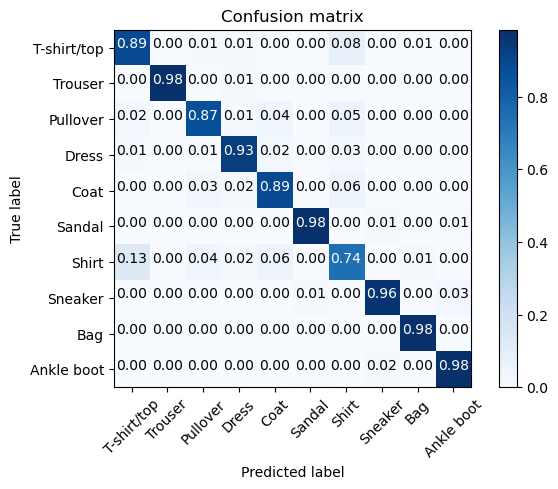

In [68]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = model1Drop.predict(test_images)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = test_labels
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plot_confusion_matrix(confusion_mtx, class_names, normalize=True, title='Confusion matrix')

# Choice 3: k-fold cross-validation

In [128]:
def k_fold_cross_validation(k, train_images, train_labels, learning_rate, num_epochs=15, batch_size=64, optimizer='adam', verbose=0, loss='sparse_categorical_crossentropy', metrics=['accuracy']):
    num_val_samples = len(train_images) // k
    all_acc = []
    all_loss = []
    all_history = []
    for i in range(k):
        print('processing fold #', i)
        val_data = train_images[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate(
            [train_images[:i * num_val_samples],
            train_images[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_labels[:i * num_val_samples],
            train_labels[(i + 1) * num_val_samples:]],
            axis=0)
        model = create_model_baseline()
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        model.compile(optimizer=opt,
                    loss=loss,
                    metrics=metrics)
        history = model.fit(partial_train_data, partial_train_targets,
                epochs=num_epochs, batch_size=batch_size, verbose=verbose, callbacks=[callback])
        val_loss, val_acc = model.evaluate(val_data, val_targets, verbose=0)
        all_acc.append(val_acc)
        all_loss.append(val_loss)
        all_history.append(history)
    return all_acc, all_loss, all_history



def plot_k_fold_cross_validation_accuracy(all_scores):
    # bar chart of accuracy
    min = np.min(all_scores)
    max = np.max(all_scores)
    delta = max - min
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Accuracy Scores')
    # set size of figure
    fig.set_size_inches(18.5, 10.5)
    ax1.bar(range(len(all_scores)), all_scores)
    ax1.set_xlabel('Folds')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(min - delta * 0.1, max + delta * 0.1)
    ax1.set_xticks(range(len(all_scores)))
    
    sns.boxplot(all_scores)
    ax2.set_xlabel('10 folds')
    ax2.set_ylabel('Accuracy')
    ax2.set_xticks([])
    plt.show()


def plot_k_fold_cross_validation_loss(all_loss):
    min = np.min(all_loss)
    max = np.max(all_loss)
    delta = max - min
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle('Loss Scores')
    ax1.bar(range(len(all_loss)), all_loss)
    ax1.set_xlabel('Folds')
    ax1.set_ylabel('Loss')
    ax1.set_ylim(min - delta * 0.1, max + delta * 0.1)
    ax1.set_xticks(range(len(all_loss)))
    

    sns.boxplot(all_loss)
    ax2.set_xlabel('10 folds')
    ax2.set_ylabel('Loss')
    ax2.set_xticks([])
    plt.show()


In [20]:
all_acc, all_loss, all_history = k_fold_cross_validation(10, train_images, train_labels, learning_rate=0.001, num_epochs=15, batch_size=64, optimizer='adam', verbose=0, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


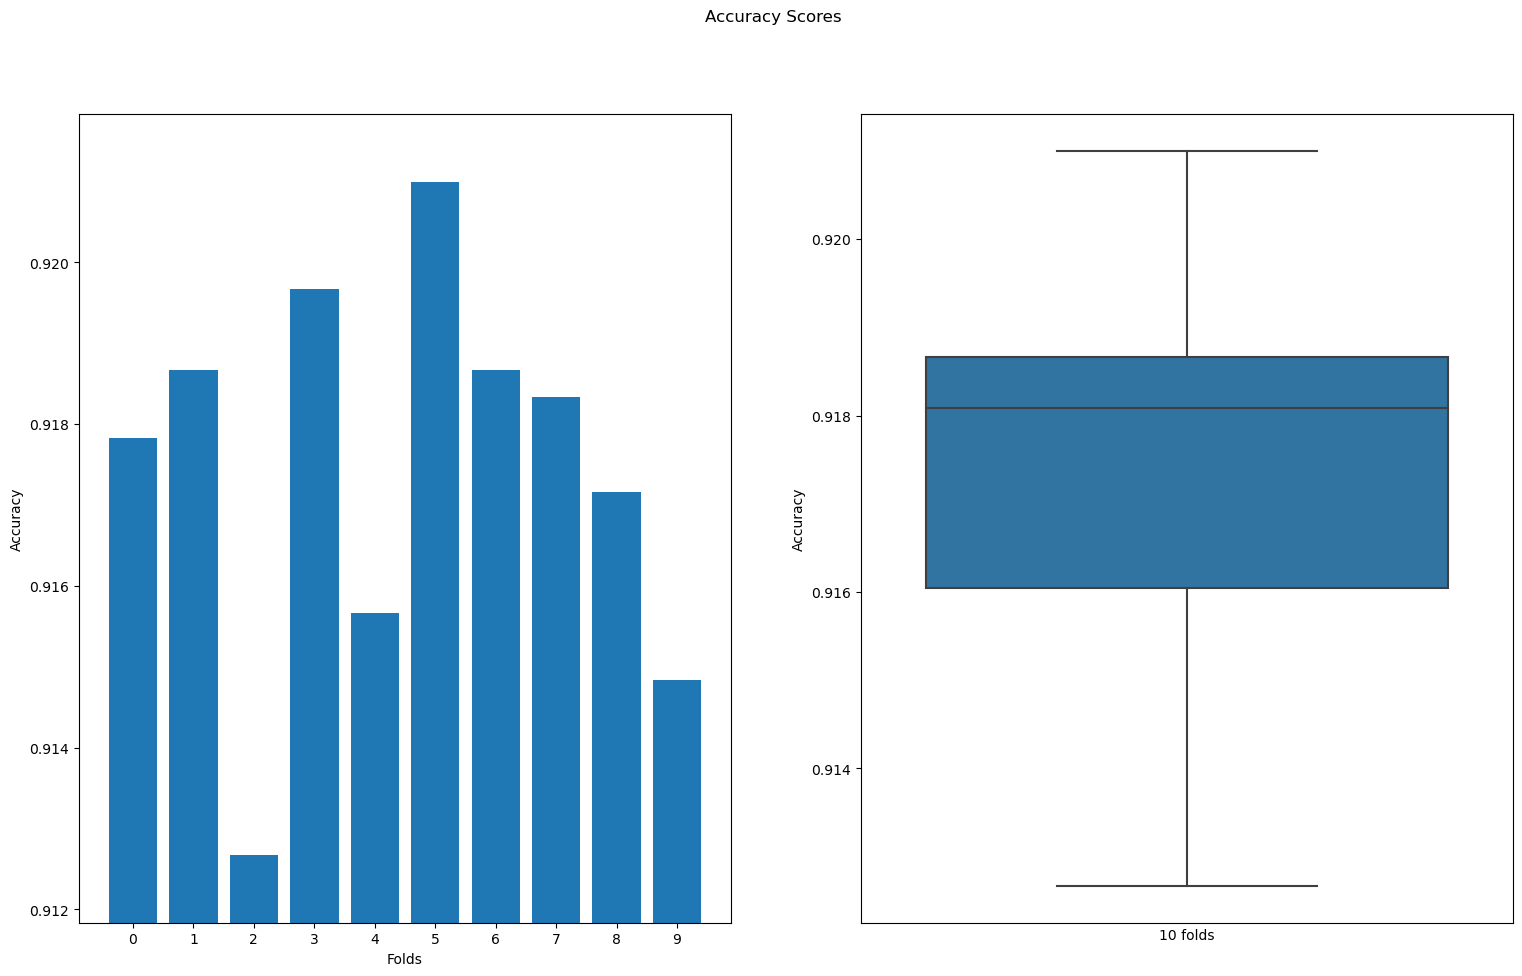

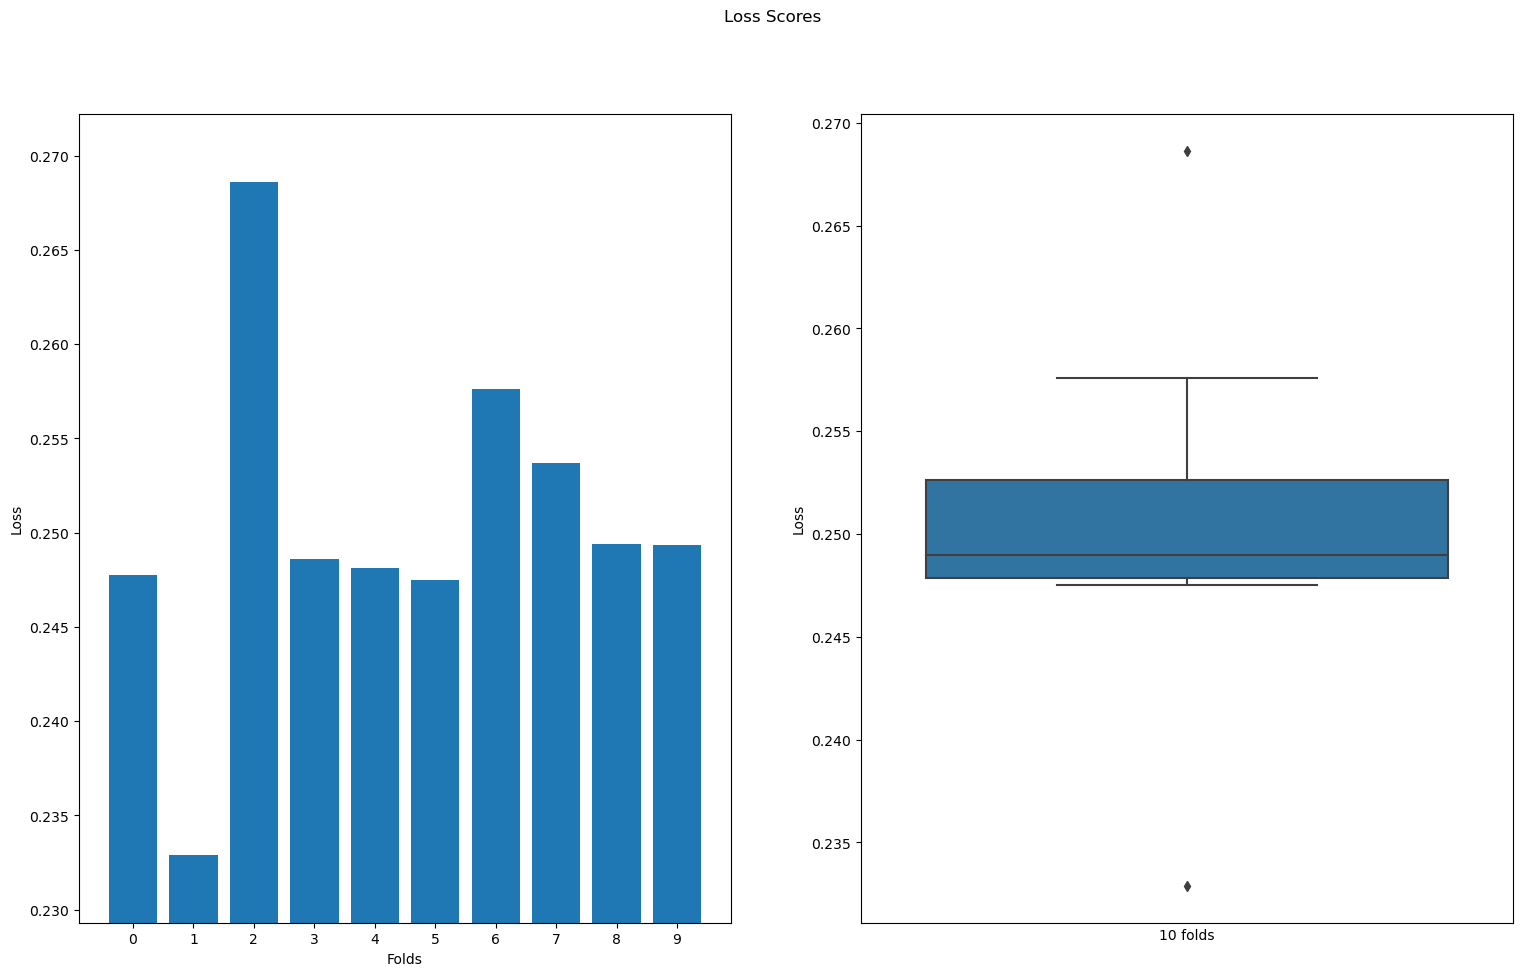

Average accuracy: 0.9174499928951263
Average loss: 0.2503499537706375


In [38]:
plot_k_fold_cross_validation_accuracy(all_acc)
plot_k_fold_cross_validation_loss(all_loss)

print(f"Average accuracy: {np.mean(all_acc)}")
print(f"Average loss: {np.mean(all_loss)}")